Here we solve Optimal Transport problem for two highly-entropic distributions

The problem of optimal transport:

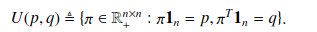

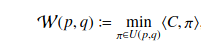

C here is a metric matrix

Regularized OT problem:

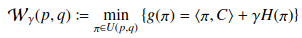

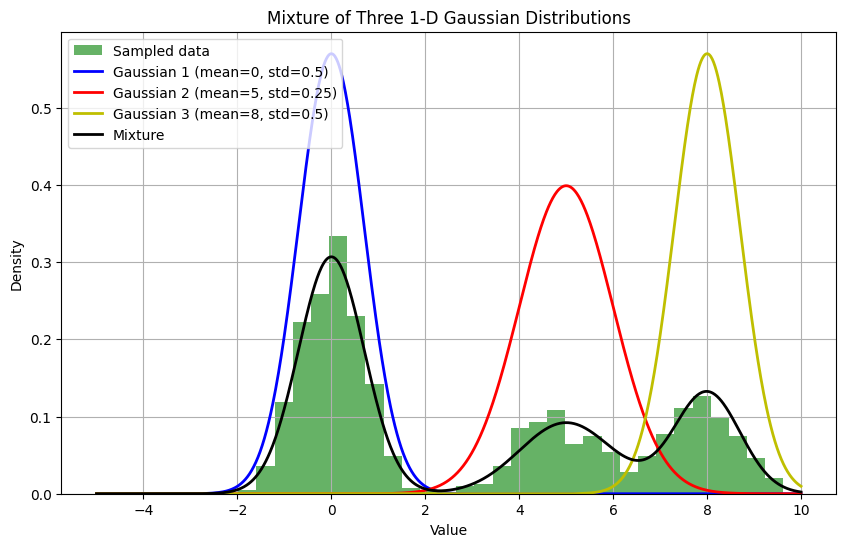

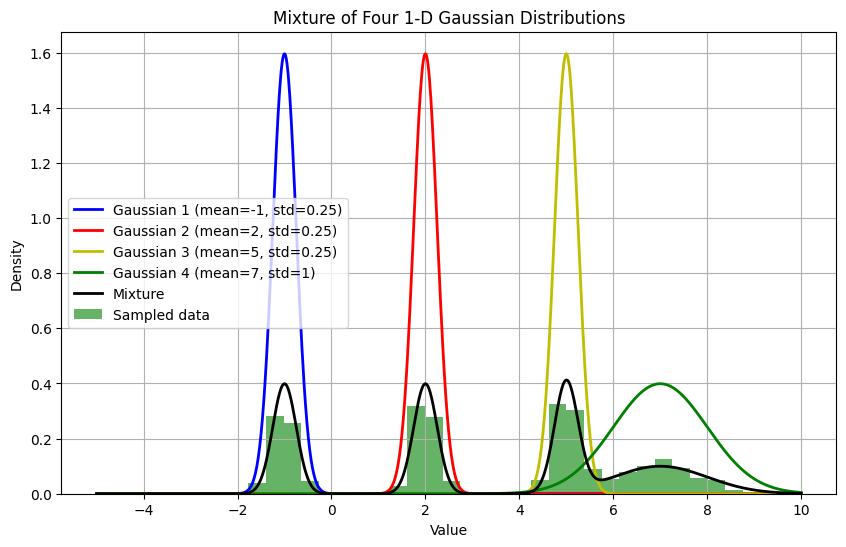

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Parameters of the two Gaussian distributions
mean1 = 0.0
std1 = 0.7
mean2 = 5.0
std2 = 1.0
mean3 = 8
std3 = 0.7

# Mixture of Gaussians
means = torch.tensor([0.0,5.0, 8.0])
stds = torch.tensor([std1,std2, std3])
# Mixing proportions
mixing_proportion = [0.7,0.3, 0.3]

def sample_mixture_of_gaussians(n_samples, mixing_proportion, means, stds):
    # Sample mixture components (0 or 1)
    components = torch.multinomial(torch.tensor(mixing_proportion), n_samples, replacement=True)

    # Generate samples based on the component chosen
    samples = means[components] + stds[components] * torch.randn(n_samples)
    return samples


# Sample from the mixture model
n_samples = 1000
samples = sample_mixture_of_gaussians(n_samples, mixing_proportion, means, stds)

# Create a histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples.numpy(), bins=30, density=True, alpha=0.6, color='g', label='Sampled data')

# Plot the two individual Gaussian distributions
x = torch.linspace(-5, 10, 1000)
gaussian1 = (1 / (std1 * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - mean1) / std1) ** 2)
gaussian2 = (1 / (std2 * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - mean2) / std2) ** 2)
gaussian3 = (1 / (std3 * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - mean3) / std3) ** 2)

mixture=(gaussian1*mixing_proportion[0]+gaussian2*mixing_proportion[1]+gaussian3*mixing_proportion[2])/torch.sum(torch.tensor(mixing_proportion))

# Plot the individual Gaussian distributions
plt.plot(x.numpy(), gaussian1.numpy(), color='b', linewidth=2, label='Gaussian 1 (mean=0, std=0.5)')
plt.plot(x.numpy(), gaussian2.numpy(), color='r', linewidth=2, label='Gaussian 2 (mean=5, std=0.25)')
plt.plot(x.numpy(), gaussian3.numpy(), color='y', linewidth=2, label='Gaussian 3 (mean=8, std=0.5)')

plt.plot(x.numpy(), mixture.numpy(), color='k', linewidth=2, label='Mixture')

# Add labels and show the plot
plt.title('Mixture of Three 1-D Gaussian Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

mixture_final=[1.0,1.0,1.0,1.0]
stds_final = torch.tensor([0.25,0.25, 0.25, 1.0])
means_final = torch.tensor([-1.0,2.0, 5.0, 7.0])

samples_final = sample_mixture_of_gaussians(n_samples, mixture_final, means_final, stds_final)
gaussian1 = (1 / (stds_final[0] * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - means_final[0]) / stds_final[0]) ** 2)
gaussian2 = (1 / (stds_final[1] * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - means_final[1]) / stds_final[1]) ** 2)
gaussian3 = (1 / (stds_final[2] * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - means_final[2]) / stds_final[2]) ** 2)
gaussian4 = (1 / (stds_final[3] * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - means_final[3]) / stds_final[3]) ** 2)

mixture_final=(gaussian1*mixture_final[0]+gaussian2*mixture_final[1]+gaussian3*mixture_final[2]+gaussian4*mixture_final[3])/torch.sum(torch.tensor(mixture_final))

# Create a histogram of the samples
plt.figure(figsize=(10, 6))
# Plot the individual Gaussian distributions
plt.plot(x.numpy(), gaussian1.numpy(), color='b', linewidth=2, label='Gaussian 1 (mean=-1, std=0.25)')
plt.plot(x.numpy(), gaussian2.numpy(), color='r', linewidth=2, label='Gaussian 2 (mean=2, std=0.25)')
plt.plot(x.numpy(), gaussian3.numpy(), color='y', linewidth=2, label='Gaussian 3 (mean=5, std=0.25)')
plt.plot(x.numpy(), gaussian4.numpy(), color='g', linewidth=2, label='Gaussian 4 (mean=7, std=1)')
plt.plot(x.numpy(), mixture_final.numpy(), color='k', linewidth=2, label='Mixture')

plt.hist(samples_final.numpy(), bins=30, density=True, alpha=0.6, color='g', label='Sampled data')

# Add labels and show the plot
plt.title('Mixture of Four 1-D Gaussian Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [5]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 11.4 MB/s eta 0:00:00


In [40]:
hist, _ = torch.histogram(samples, bins=50)
hist_final, _ = torch.histogram(samples_final, bins=50)

In [41]:
hist.shape

torch.Size([50])

In [44]:

import ot
import ot.plot
M = ot.dist(mixture.reshape((n_samples,1)), mixture_final.reshape((n_samples, 1)))
M /= M.max()


(<Axes: >, <Axes: >, <Axes: >)

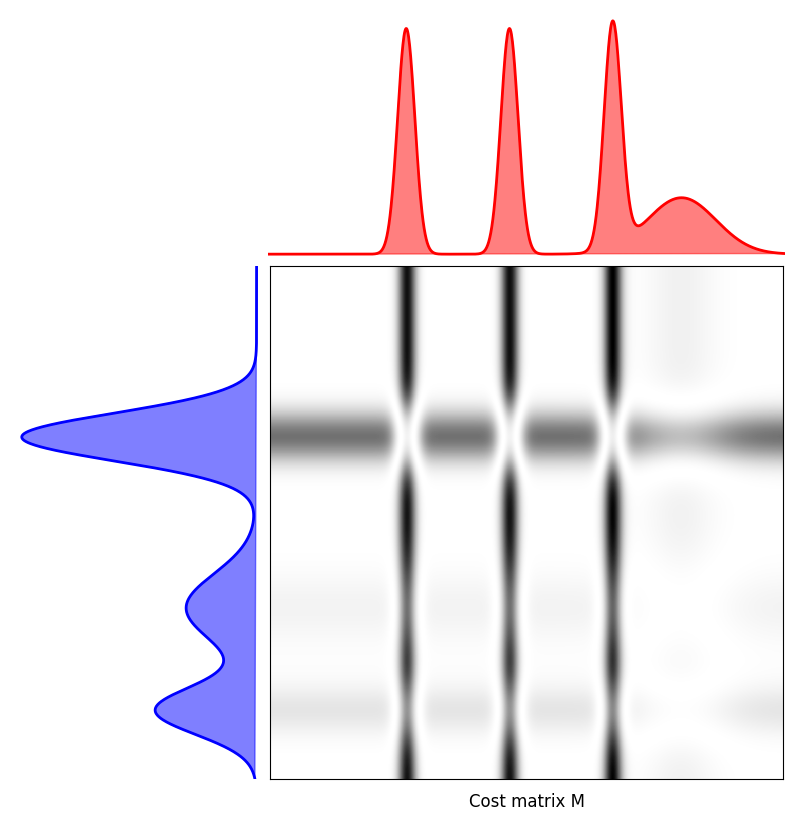

In [46]:
import matplotlib.pylab as pl
pl.figure(2, figsize=(10, 10))
ot.plot.plot1D_mat(mixture, mixture_final, M, "Cost matrix M")

(<Axes: >, <Axes: >, <Axes: >)

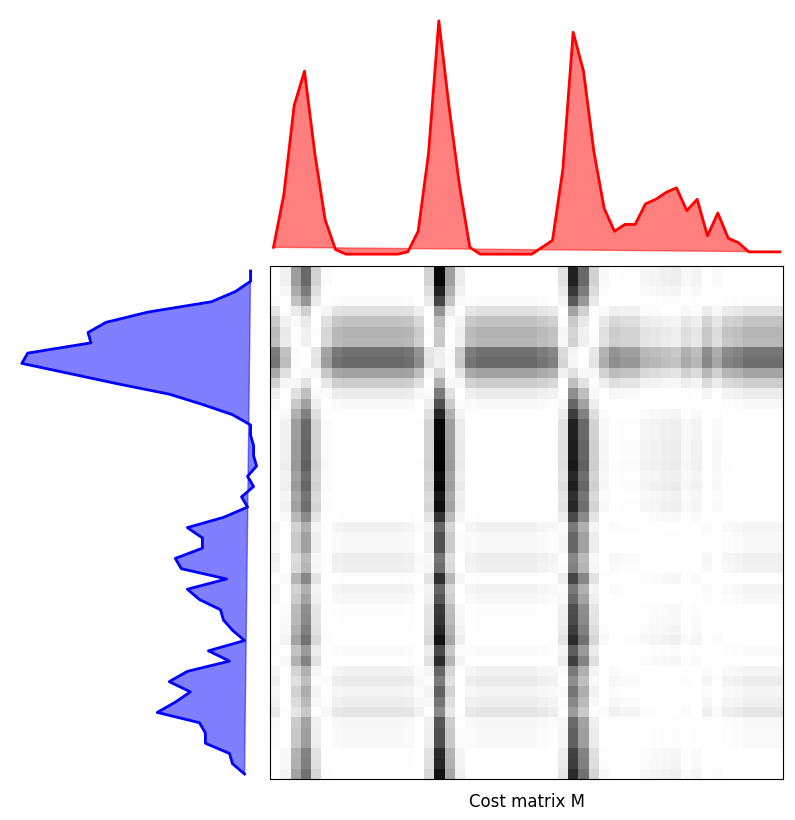

In [47]:
M_1 = ot.dist(hist.reshape((50,1)), hist_final.reshape((50, 1)))
M_1 /= M_1.max()
import matplotlib.pylab as pl
pl.figure(2, figsize=(10, 10))
ot.plot.plot1D_mat(hist, hist_final, M_1, "Cost matrix M")

#Sinkhorn algorithm

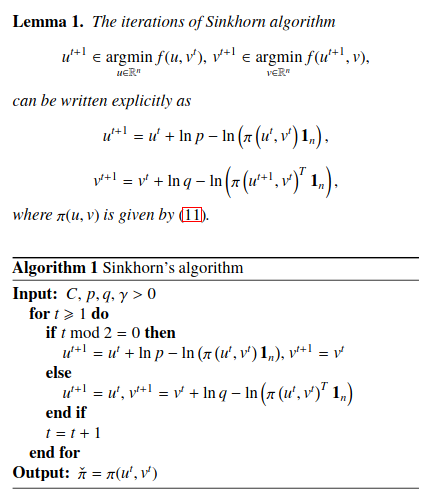

Sinkhorn is asymptotically the best known algorithm

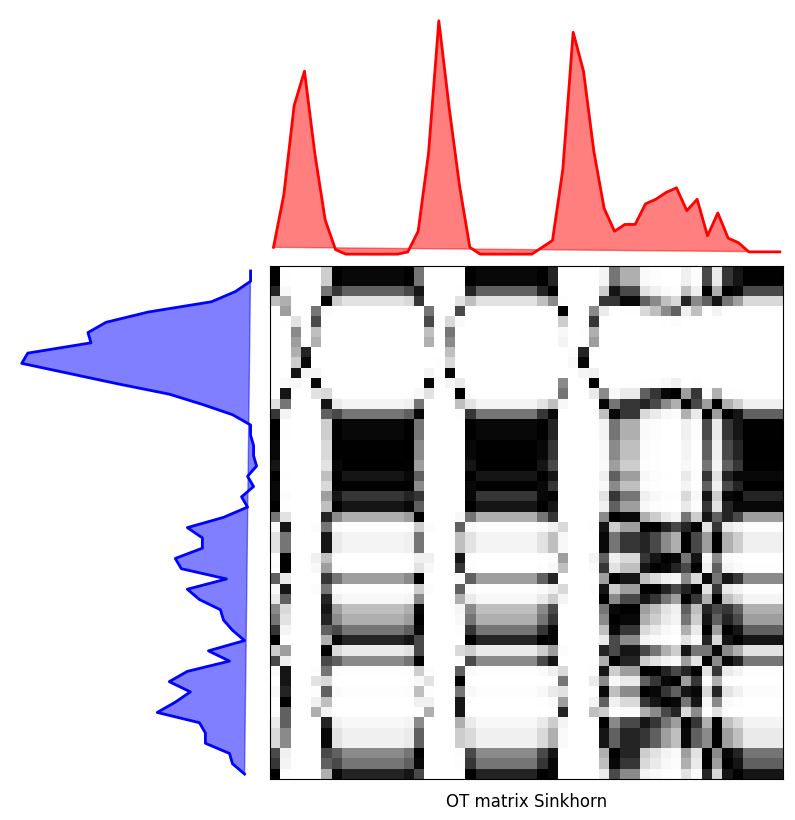

In [52]:
a_1=hist
b_1=hist_final
lambd = 1e-2
Gs_1 = ot.sinkhorn(a_1, b_1, M_1, lambd, verbose=True)

pl.figure(4, figsize=(10, 10))
ot.plot.plot1D_mat(a_1, b_1, Gs_1, "OT matrix Sinkhorn")

pl.show()

#Conditional gradient method (Frank-Wolfe) for regularized problem

In [ ]:

a/=0.1*torch.sum(a)
b/=0.1*torch.sum(b)

In [65]:
a_1/=torch.sum(a_1)
b_1/=torch.sum(b_1)

It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|1.712437e-01|0.000000e+00|0.000000e+00
    1|3.713933e-02|3.610844e+00|1.341043e-01
    2|3.580240e-02|3.734197e-02|1.336932e-03
    3|3.578445e-02|5.016754e-04|1.795217e-05
    4|3.575634e-02|7.859750e-04|2.810359e-05
    5|3.575573e-02|1.719089e-05|6.146729e-07
    6|3.575515e-02|1.604509e-05|5.736947e-07
    7|3.575499e-02|4.688522e-06|1.676381e-07
    8|3.575490e-02|2.292172e-06|8.195639e-08
    9|3.575485e-02|1.458657e-06|5.215406e-08
   10|3.575481e-02|1.041899e-06|3.725290e-08
   11|3.575478e-02|8.335198e-07|2.980232e-08
   12|3.575476e-02|6.251403e-07|2.235174e-08
   13|3.575474e-02|5.209505e-07|1.862645e-08
   14|3.575473e-02|3.125704e-07|1.117587e-08
   15|3.575472e-02|3.125705e-07|1.117587e-08
   16|3.575471e-02|3.125706e-07|1.117587e-08
   17|3.575471e-02|1.041902e-07|3.725290e-09
   18|3.575470e-02|3.125707e-07|1.117587e-08
   19|3.575469e-02|1.041902e-07|3.725290e-09
It. 

(<Axes: >, <Axes: >, <Axes: >)

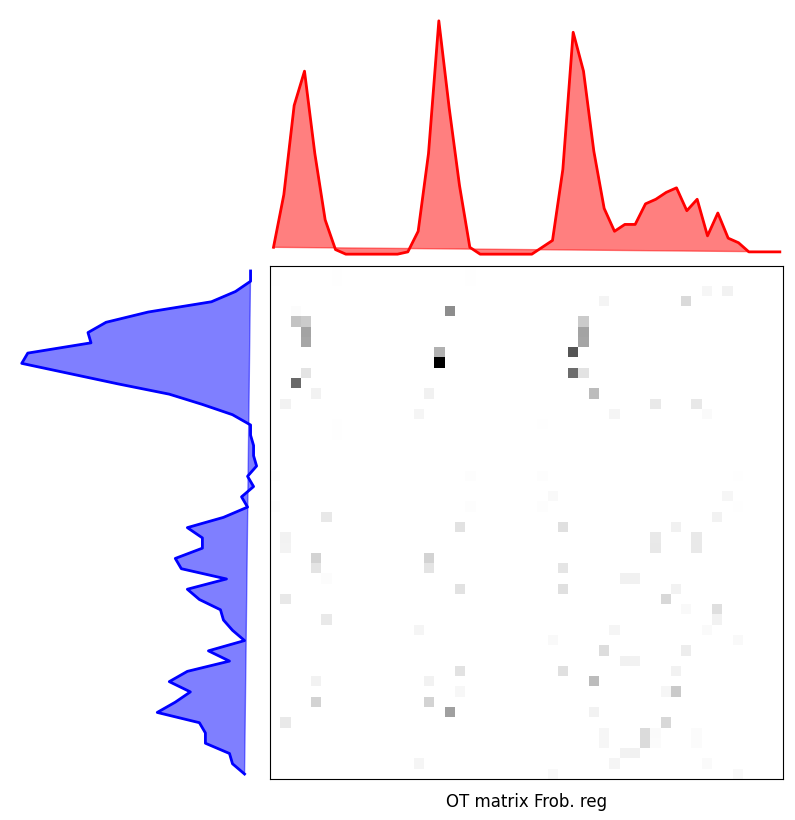

In [71]:
def f(G):
    return 0.5 * torch.sum(G**2)


def df(G):
    return G

Gl2_1 = ot.optim.cg(a_1, b_1, M_1, reg, f, df, verbose=True)



reg = 1e-3

pl.figure(3, figsize=(10, 10))
ot.plot.plot1D_mat(a_1, b_1, Gl2_1, "OT matrix Frob. reg")

It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|     nan|0.000000e+00|0.000000e+00
    1|     nan|     nan|     nan
    2|     nan|     nan|     nan
    3|     nan|     nan|     nan
    4|     nan|     nan|     nan
    5|     nan|     nan|     nan
    6|     nan|     nan|     nan
    7|     nan|     nan|     nan
    8|     nan|     nan|     nan
    9|     nan|     nan|     nan
   10|     nan|     nan|     nan
   11|     nan|     nan|     nan
   12|     nan|     nan|     nan
   13|     nan|     nan|     nan
   14|     nan|     nan|     nan
   15|     nan|     nan|     nan
   16|     nan|     nan|     nan
   17|     nan|     nan|     nan
   18|     nan|     nan|     nan
   19|     nan|     nan|     nan
It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
   20|     nan|     nan|     nan
   21|     nan|     nan|     nan
   22|     nan|     nan|     nan
   23|     nan|     nan|     nan
   24|  

(<Axes: >, <Axes: >, <Axes: >)

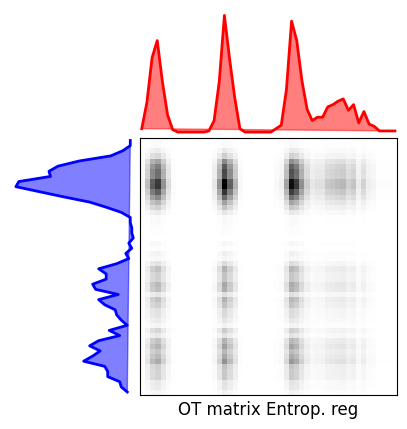

In [84]:
reg = 1e-1

Ge_1 = ot.optim.cg(a_1, b_1, M_1, reg, f, df, verbose=True)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a_1, b_1, Ge_1, "OT matrix Entrop. reg")

#Conclusion

Conditional gradient method for entropy-regularized seems much better visually than Sinkhorn